In [1]:
import itertools

# Why the Structure and Interpretation of Computer Programming (SICP)?

"To use an analogy, if SICP were about automobiles, it would be for the person who wants to know how cars work, how they are built, and how one might design fuel-efficient, safe, reliable vehicles for the 21st century. The people who hate SICP are the ones who just want to know how to drive their car on the highway, just like everyone else." - 

Peter Norvig, Director of Research & Search Quality, Google

# 2 Big SICP Ideas We're Going To Cover

1. Abstraction
2. Closure

# What is abstraction?

" The essence of abstraction is preserving information that is relevant in a given context, and forgetting information that is irrelevant in that context. " - John V Guttag, Former head of the department of Electrical Engineering and Computer Science at MIT

# What is closure?

When the output of something is the same type as itself. For example, imagine a function that returns another function. 

```
def times_n(n):
    def func(x):
        return x*n
    return func 
```

# Why do we care?

- "A change of perspective is worth 80 IQ points. - Alan Kay
- Because how you represent things matters. 
- Not all representations are created equal - there are better and worse ways to represent things, depending on the problem(s)

# An example in hardware

- Imagine that I wanted to create a machine that could any 2 numbers...
- I could represent the numbers as 1s and 0s (ie. a base 2 system and add them together)

# How do computers count?

base 2 = base 10
- 0000 = 0
- 0001 = 1
- 0010 = 2
- 0011 = 3
- 0100 = 4
- 0101 = 5
- 0110 = 6
- 0111 = 7
...etc

# How do computers add?

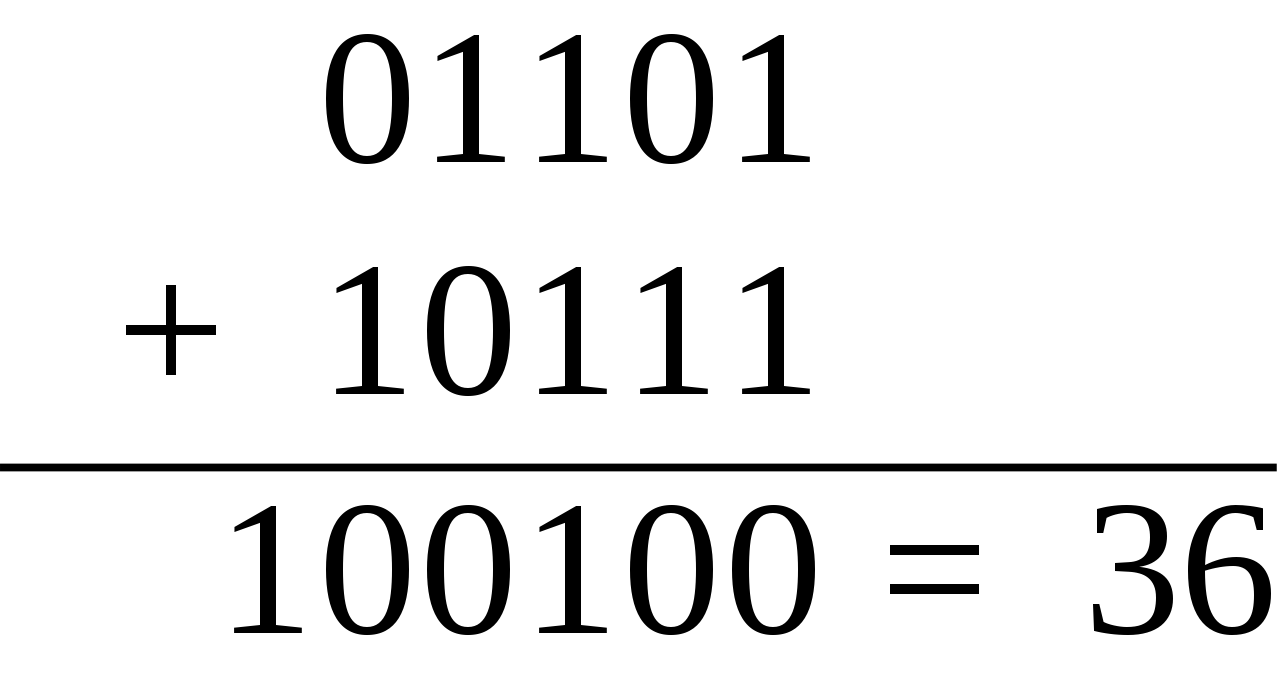

# From NANDs upwards

You can make any logic gate using NAND gates

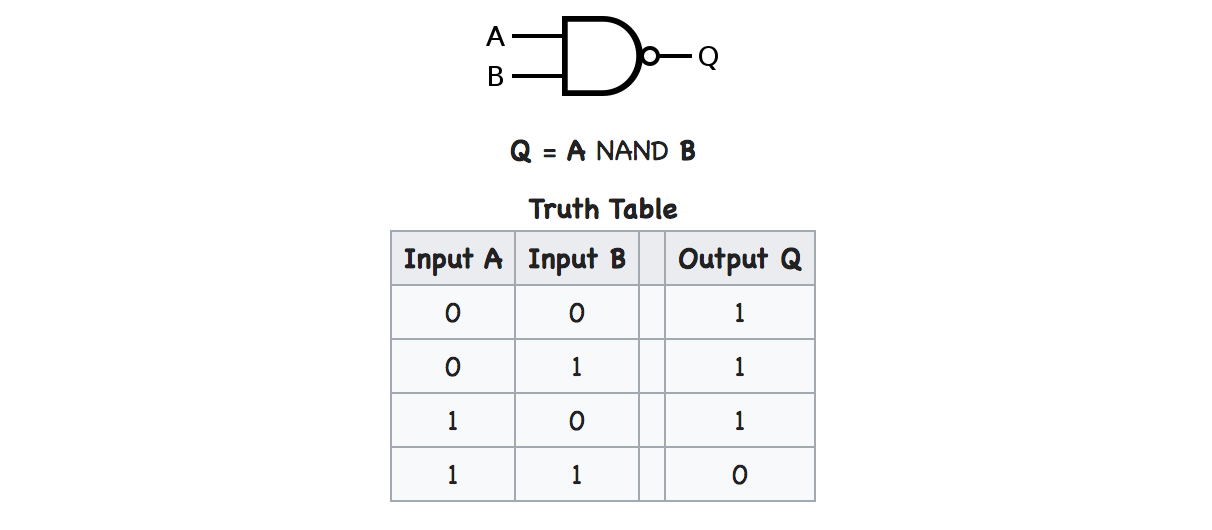

In [2]:
def print_outputs(gate, inputs = list(itertools.product([1,0], repeat=2)), integers = False, headers=['a', 'b', 'out']):
    print("\t | \t".join(headers))
    print("--------------" * len(headers))
    for inp in inputs:
        input_str = "\t | \t".join([str(i) for i in inp])
        gate_out = gate(*inp)
        if integers:
            gate_out = [str(int(o)) for o in gate_out]
        else:
            gate_out = [str(gate_out)]
        
        gate_out = "\t | \t".join(gate_out)
        print(f"{input_str} \t | \t {gate_out}")

In [3]:
def nand_gate(a, b):
    return not(a and b)

print_outputs(nand_gate)

a	 | 	b	 | 	out
------------------------------------------
1	 | 	1 	 | 	 False
1	 | 	0 	 | 	 True
0	 | 	1 	 | 	 True
0	 | 	0 	 | 	 True


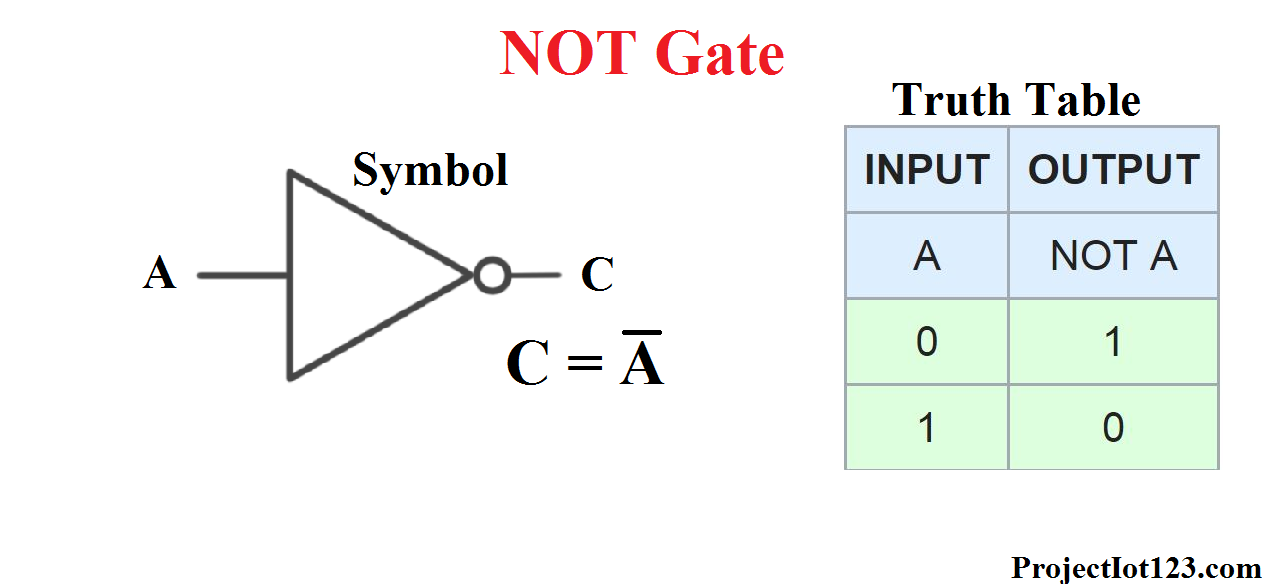

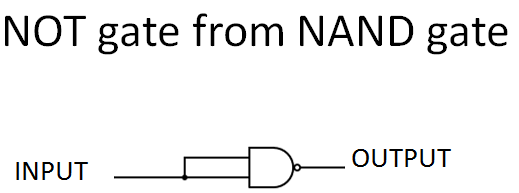

In [4]:
def not_gate(a):
    return nand_gate(a, a)

print_outputs(nand_gate, inputs=[(1,1),(0, 0)])

a	 | 	b	 | 	out
------------------------------------------
1	 | 	1 	 | 	 False
0	 | 	0 	 | 	 True


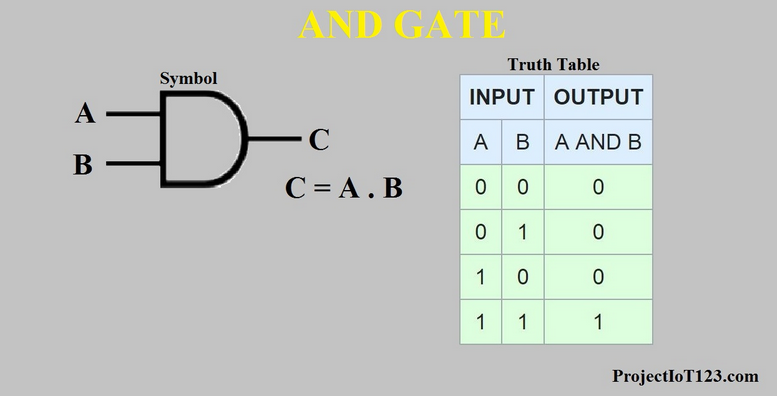

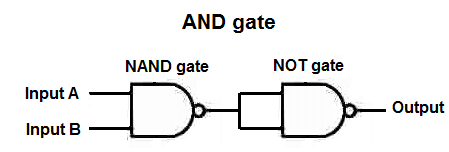

In [5]:
def and_gate(a, b):
    return not_gate(nand_gate(a, b))

print_outputs(and_gate)

a	 | 	b	 | 	out
------------------------------------------
1	 | 	1 	 | 	 True
1	 | 	0 	 | 	 False
0	 | 	1 	 | 	 False
0	 | 	0 	 | 	 False




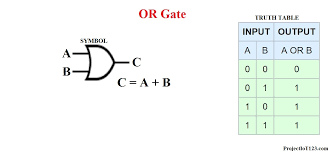

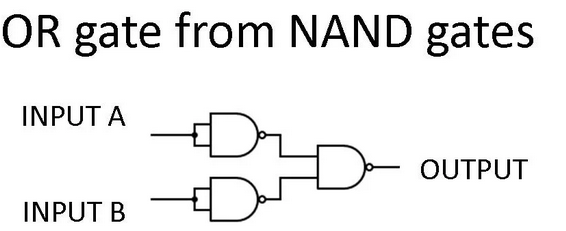

In [6]:
def or_gate(a, b):
    return nand_gate(nand_gate(a, a), nand_gate(b, b))

print_outputs(or_gate)

a	 | 	b	 | 	out
------------------------------------------
1	 | 	1 	 | 	 True
1	 | 	0 	 | 	 True
0	 | 	1 	 | 	 True
0	 | 	0 	 | 	 False


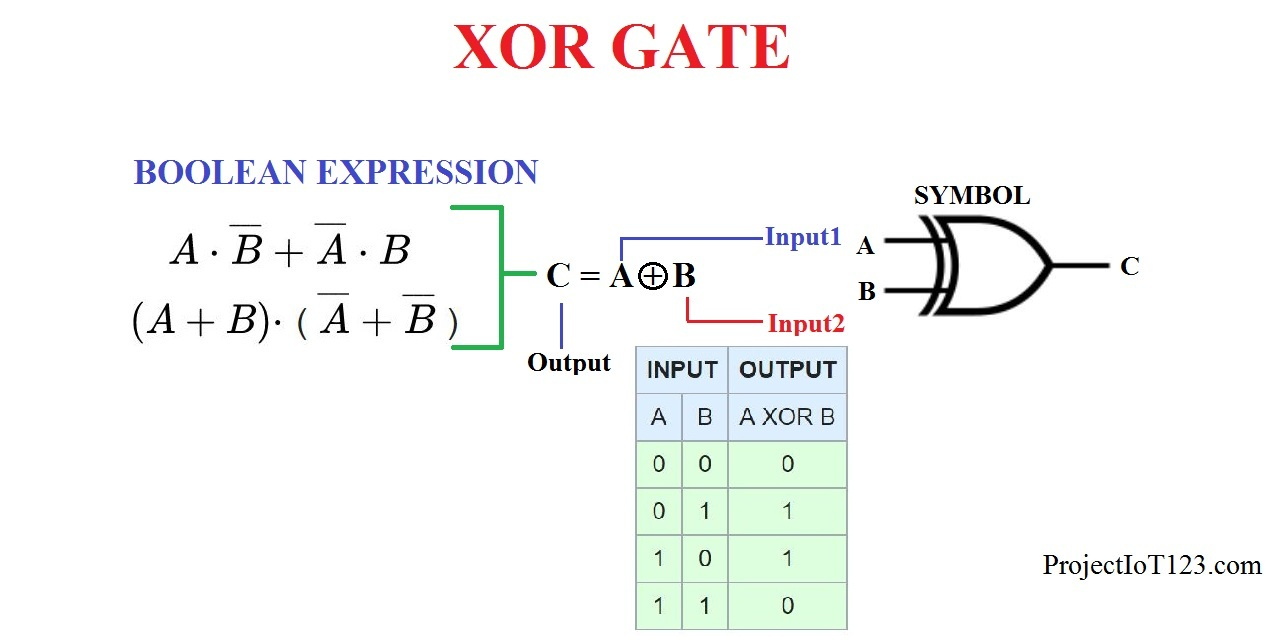

In [7]:
def xor_gate(a, b):
    nand_out = nand_gate(a, b)
    not_out = or_gate(a, b)
    return and_gate(nand_out, not_out)

print_outputs(xor_gate)

a	 | 	b	 | 	out
------------------------------------------
1	 | 	1 	 | 	 False
1	 | 	0 	 | 	 True
0	 | 	1 	 | 	 True
0	 | 	0 	 | 	 False


# Abstraction 

Notice at each step, we don't have to care how the logic gates are assembled from what combination of primitive nands, all we need to care about is that they conform to the spec that we defined (ie. the truth table)

# Half Adder

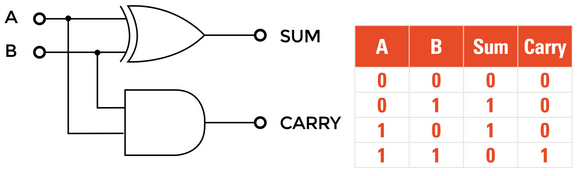

In [8]:
def half_adder(a, b):
    sum_out = xor_gate(a, b)
    nand_out = and_gate(a, b)
    return sum_out, nand_out

print_outputs(half_adder, integers=True, headers=['a', 'b', 'sum', 'c_out'])

a	 | 	b	 | 	sum	 | 	c_out
--------------------------------------------------------
1	 | 	1 	 | 	 0	 | 	1
1	 | 	0 	 | 	 1	 | 	0
0	 | 	1 	 | 	 1	 | 	0
0	 | 	0 	 | 	 0	 | 	0


# Full Adder

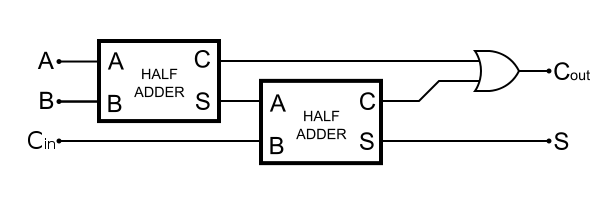

In [9]:
def full_adder(a, b, c):
    _sum, _carry1 = half_adder(a, b)
    sum_out, _carry2 = half_adder(_sum, c)
    carry_out = or_gate(_carry1, _carry2)
    return sum_out, carry_out


inputs = itertools.product([1,0], repeat=3)

print_outputs(full_adder, 
              inputs = inputs,
              integers=True,
              headers=['a', 'b', 'c_in', 'sum', 'c_out'])

a	 | 	b	 | 	c_in	 | 	sum	 | 	c_out
----------------------------------------------------------------------
1	 | 	1	 | 	1 	 | 	 1	 | 	1
1	 | 	1	 | 	0 	 | 	 0	 | 	1
1	 | 	0	 | 	1 	 | 	 0	 | 	1
1	 | 	0	 | 	0 	 | 	 1	 | 	0
0	 | 	1	 | 	1 	 | 	 0	 | 	1
0	 | 	1	 | 	0 	 | 	 1	 | 	0
0	 | 	0	 | 	1 	 | 	 1	 | 	0
0	 | 	0	 | 	0 	 | 	 0	 | 	0


# How do we use this?

Each full adder is essentially a one bit adder - we can arrange an array of full adders to create a machine that adds an arbitrary number of bits 

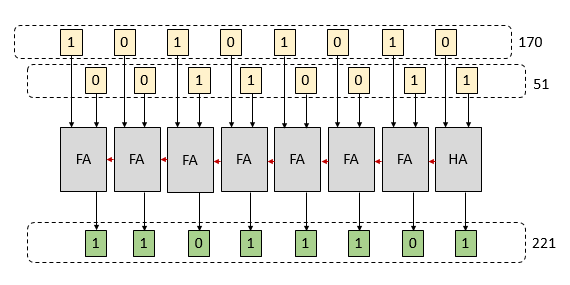

*NB. In case anyone is wondering at this point, "how do computers subtract?". Look up 2s complement subtraction*

In [10]:
# Consider the difference between this...
def full_adder_hang_out(a, b, c):
    sum_out_1 = nand_gate(nand_gate(nand_gate(a, b), or_gate(a, b)), 
                          nand_gate(nand_gate(a, b), or_gate(a, b)) )
    _carry1 = nand_gate(nand_gate(a, b), nand_gate(a, b))
    sum_out_2 = nand_gate(nand_gate(nand_gate(sum_out_1, c), or_gate(sum_out_1, c)),
                         nand_gate(nand_gate(sum_out_1, c), or_gate(sum_out_1, c)))
    _carry2 = nand_gate(nand_gate(sum_out_1, c), nand_gate(sum_out_1, c))
    carry_out = or_gate(_carry1, _carry2)
    return sum_out_2, carry_out

# and this...
def full_adder_abs(a, b, c):
    _sum, _carry = half_adder(a, b)
    sum_out, _carry2 = half_adder(_sum, c)
    carry_out = or_gate(_carry, _carry2)
    return sum_out, carry_out

# now, imagine trying to make changes in, say, the implementation of half_adder. which one would be easier?

In [11]:
# Just to prove they work the same
inputs = list(itertools.product([1,0], repeat=3))

print("EVERYTHING HANGING OUT")
print_outputs(full_adder_hang_out, 
              inputs = inputs,
              integers=True,
              headers=['a', 'b', 'c_in', 'sum', 'c_out'])

print("\nABSTRACTED")
print_outputs(full_adder_abs, 
              inputs = inputs,
              integers=True,
              headers=['a', 'b', 'c_in', 'sum', 'c_out'])

EVERYTHING HANGING OUT
a	 | 	b	 | 	c_in	 | 	sum	 | 	c_out
----------------------------------------------------------------------
1	 | 	1	 | 	1 	 | 	 1	 | 	1
1	 | 	1	 | 	0 	 | 	 0	 | 	1
1	 | 	0	 | 	1 	 | 	 0	 | 	1
1	 | 	0	 | 	0 	 | 	 1	 | 	0
0	 | 	1	 | 	1 	 | 	 0	 | 	1
0	 | 	1	 | 	0 	 | 	 1	 | 	0
0	 | 	0	 | 	1 	 | 	 1	 | 	0
0	 | 	0	 | 	0 	 | 	 0	 | 	0

ABSTRACTED
a	 | 	b	 | 	c_in	 | 	sum	 | 	c_out
----------------------------------------------------------------------
1	 | 	1	 | 	1 	 | 	 1	 | 	1
1	 | 	1	 | 	0 	 | 	 0	 | 	1
1	 | 	0	 | 	1 	 | 	 0	 | 	1
1	 | 	0	 | 	0 	 | 	 1	 | 	0
0	 | 	1	 | 	1 	 | 	 0	 | 	1
0	 | 	1	 | 	0 	 | 	 1	 | 	0
0	 | 	0	 | 	1 	 | 	 1	 | 	0
0	 | 	0	 | 	0 	 | 	 0	 | 	0


# Abstraction

- So it is with functions, classes and the like. 
- We don't need to concern ourselves with the implementation details, only with the interface provided by the author
- Part of our job is deciding on better abstractions and *naming* them well
- This is one reason (IMO) the question "how long will it take?" is not always as straightforward as it sounds 
    - you can make a distinction between how long it takes before a feature works and how long before it is written well
    - being expedient with the structure of the abstractions you write also incurs a technical debt that is real
    - although, of course, it is impossible to anticipate ALL possibilities
    - "premature optimization is the root of all evil." - Sir Tony Hoare, invesntor of quicksort and Turing Award winner

# Another example with layers...

# Functions

Imagine that you did not have variables or assignment (eg. you couldn't write `x=3`). All you had were functions. It turns out, that's all we need.

In [12]:
# this is a regular function as you'd recognise 

def add_3(x):
    return x + 3

add_3(2)

5

In [13]:
# this is an anonymous function assigned to a variable
an_anonymous_add_3 = lambda x: x + 3
an_anonymous_add_3(2)

5

In [14]:
# this is a function that returns a function
def create_add_3():
    return lambda x: x + 3

add_3 = create_add_3()
add_3(2)

5

In [15]:
# this is a function that modifies another function
def add_3_to_output(fn):
    return lambda x: fn(x) + 3

add_3_to_output(lambda x: x * 0.5)(4)

5.0

# Code as data

- So, we are use to functions as being verbs like `add_3`. 
- But they can also be nouns...
- Imagine a data structure (like a list or a dictionary) called a "pair". 
- A pair is a thing that holds 2 other things and is made from a constructor function called `cons`
- It has 2 selector functions called `car` and `cdr` that allow us to get the data out of it

```
x = cons(1, 2)
(car x) #returns 1
(cdr x) #returns 2
```

In [16]:
# Credit to Son who originally wrote this python implementation of cons, car, cdr, print_list, accumulate
# ...etc from Scheme

def cons(x, y):
    return lambda m: m(x, y)

def car(z):
    return z(lambda p,q: p)

def cdr(z):
    return z(lambda p,q: q)

x = cons(1, 2)
print(f"car(x) returns {car(x)}")
print(f"cdr(x) returns {cdr(x)}")

car(x) returns 1
cdr(x) returns 2


# That's cute but...

- Who cares? 
- What use is a data structure that can only store 2 things?
- Hold my beer...

In [17]:
def to_list(lst):
    if cdr(lst) is None:
        return [car(lst)]
    else:
        return [car(lst)] + to_list(cdr(lst)) #recursion!

to_list(cons(1, cons(2, cons(3, cons(4, None)))))

[1, 2, 3, 4]

In [18]:
def make_list(*args):
    if args:
        return cons(args[0], make_list(*args[1:]))
    else:
        return None

to_list(make_list(0, 1, 2, 3, 4, 5))

[0, 1, 2, 3, 4, 5]

# Tada!

- We've made lists in python using nothing but functions
- But wait, lists have all sorts of neat functionality like `map`

In [19]:
def accumulate(op, initial, seq):
    if seq is None:
        return initial
    else:
        return op(car(seq), accumulate(op, initial, cdr(seq))) #more recursion!

def length(lst):
    return accumulate((lambda x, y: y+1), 0, lst) 

length(cons(1, cons(2, cons(3, cons(4, cons(5, cons(6, None)))))))

6

# Layering...

- You can create new interfaces on top of existing ones to create yet another layer of abstraction that is a better model for the problem you are trying to solve...
- Let's take vectors are an example 

In [20]:
def make_vector(*elems):
    return make_list(*elems)

def vector_to_list(vec):
    return to_list(vec)
    
vector_to_list(make_vector(0, 1, 2, 3, 4, 5))

[0, 1, 2, 3, 4, 5]

In [25]:
def append_to_vector(elem, vec):
    return cons(elem, vec)

def map_vector(fn, vec):
    return accumulate((lambda x,y: cons(fn(x),y)), None, vec)
    
vector_to_list(map_vector(lambda x: x + 1, make_vector(0, 1, 2, 3, 4, 5)))

[1, 2, 3, 4, 5, 6]

# Vector Addition

[3,4] + [4,1] 
= [3 + 4, 4 + 1] 
= [7, 5]

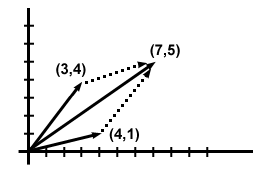

In [37]:
def add_vector(vec1, vec2):
    def _itr(v1, v2, acc):
        if v1 is None:
            return acc
        else:
            return append_to_vector(car(vec1) + car(vec2), add_vector(cdr(vec1), cdr(vec2)))
    return _itr(vec1, vec2, None)

to_list(add_vector(make_vector(0, 1), make_vector(2, 3)))

[2, 4]

# Layers

- So, we create layers of data on top of each other
- Each layer of data interacts with each other via functions
- At a given layer, you need not concern yourself with the implementation of other layers

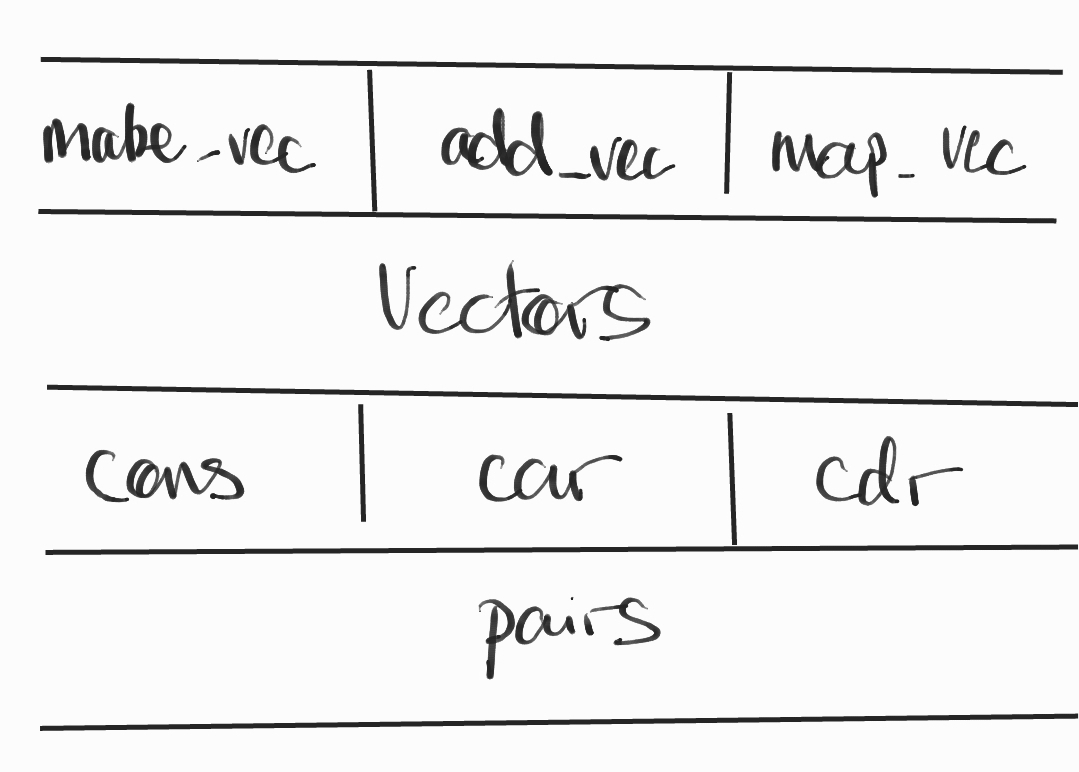

# Things to note...

- We did all that without:
    - Assignment. At no point, did we even use the `=` sign
    - Loops. There was no `for` loops or `while` loops
- Notice also that to make this work, we passed functions into functions that returned functions. 
- This allows us to write small simple functions that when joined together create more complicated things.
- Actually, we don't even need numbers - using functions alone, we can create integers (look up Church numerals)

# To hammer home this idea of abstraction...

- Just to emphasise again this idea of layers of abstraction
- You can redefine the internal implementation of `cons`, `car` and `cdr` and it wouldn't matter to any code calling it!
- This is kind of a super power that a good abstraction gives you 

In [21]:
def cons(x, y):
    return (x, y)

def car(z):
    return z[0]

def cdr(z):
    return z[1]

length(cons(1, cons(2, cons(3, cons(4, cons(5, cons(6, None)))))))

6

# The End

Key Points:
1. "A change in perspective is worth 80 IQ points"
2. You can pass functions into functions and get back functions - this is actually a pretty powerful idea when you get used to it
3. You can build anything from NAND gates and functions